In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./VT-clean.csv')
# data = pd.read_csv('./MA-clean.csv.gz', compression='gzip', low_memory=False)

/Users/zhouyuan57/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
data = data.drop(['stop_time','police_department','violation_raw'],axis=1)

In [3]:
data.count()

id                       283285
state                    283285
stop_date                283285
stop_time                283285
location_raw             282591
county_name              282580
county_fips              282580
fine_grained_location    282938
police_department        283285
driver_gender            281573
driver_age_raw           282114
driver_age               281999
driver_race_raw          279301
driver_race              278468
violation_raw            281107
violation                281107
search_conducted         283285
search_type_raw          281045
search_type                3419
contraband_found         283251
stop_outcome             280960
is_arrested              283285
officer_id               283273
dtype: int64

In [4]:
data['search_type'].fillna('N/A',inplace=True)

In [53]:
#data = data.drop(['search_type_raw'],axis=1)

In [5]:
data.dropna(inplace=True) #删除每一行的missing value

Violation

In [6]:
data['violation_raw'].value_counts()

Moving Violation              212100
Vehicle Equipment              50600
Externally Generated Stop       6160
Investigatory Stop              3608
Suspicion of DWI                 711
(Winooski) Be On Look Rqst         1
(Winooski) Mtr Vhc Vltn            1
Name: violation_raw, dtype: int64

In [14]:
data['violation'].value_counts()

Moving violation      212100
Equipment              50600
Other                   9768
DUI                      711
Other (non-mapped)         2
Name: violation, dtype: int64

In [16]:
data['stop_outcome'].value_counts()

Written Warning         166488
Citation                103401
Arrest for Violation      3206
Warrant Arrest              76
Verbal Warning              10
Name: stop_outcome, dtype: int64

# Stop by Gender

In [8]:
data['driver_gender'].value_counts()

M    174070
F     99111
Name: driver_gender, dtype: int64

stop by race

In [18]:
data['driver_race_raw'].value_counts()

White                             261339
Black                               5571
Asian or Pacific Islander           3446
Hispanic                            2562
Native Americn or Alaskn Nativ       263
Name: driver_race_raw, dtype: int64

In [54]:
data['driver_race'].value_counts()

White       2531342
Black        351807
Hispanic     338516
Asian        102338
Other         75612
Name: driver_race, dtype: int64

# Stop Frequency by Race and Age

In [34]:
data = data[data['driver_race'] != 'Other']

In [35]:
data['driver_race'].unique()

array(['White', 'Black', 'Asian', 'Hispanic'], dtype=object)

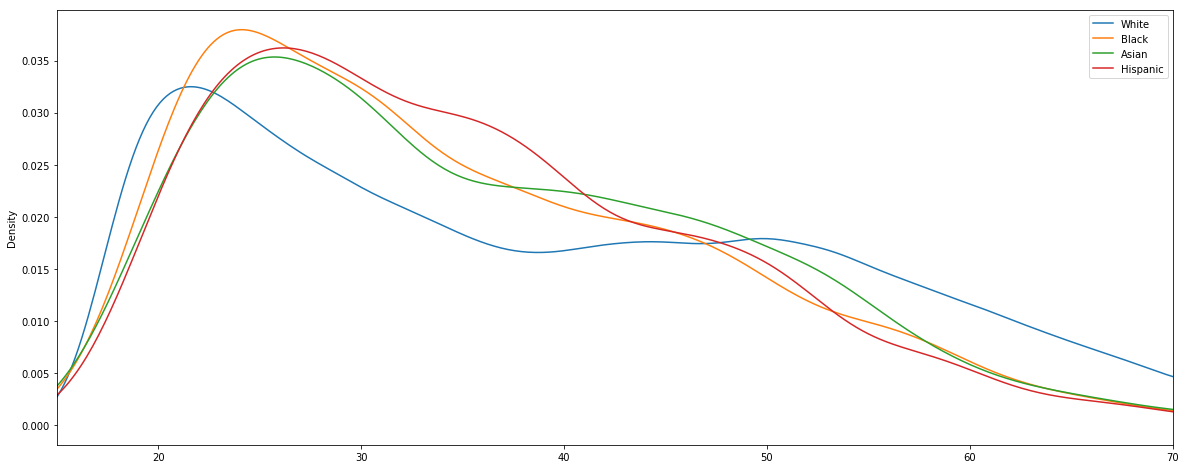

In [36]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_xlim(15,70)
for race in data['driver_race'].unique():
    s = data[data['driver_race'] == race]['driver_age']
    s.plot(kind='kde',ax=ax,label = race)
#     s.plot(kind='bar',ax=ax,label = race)
ax.legend()

# Analyze violation and outcome data

# citatoins_per_warning: The ratio of citations to warnings. Higher number means high likelihood of being tickets
arrest_rate - Ther percentage of stops that end in an arrest

In [37]:
def compute_outcome_stats(df):
    n_total = len(df)
    n_warnings = len(df[df['stop_outcome'] == 'Written Warning'])
    n_citations = len(df[df['stop_outcome'] == 'Citation'])
    n_arrests = len(df[df['stop_outcome'] == 'Arrest for Violation'])
    citation_per_warning = n_citations / n_warnings
    arrest_rate = n_arrests / n_total
    return pd.Series(data={'n_warnings':n_warnings, 
                              'n_total':n_total,
                              'n_citations':n_citations,
                              'n_arrests':n_arrests, 
                              'citation_per_warning': citation_per_warning, 
                              'arrest_rate': arrest_rate})
                      
    

In [38]:
compute_outcome_stats(data)

arrest_rate                  0.011721
citation_per_warning         0.620751
n_arrests                 3199.000000
n_citations             103270.000000
n_total                 272918.000000
n_warnings              166363.000000
dtype: float64

Breakdown by gender

In [39]:
data.groupby('driver_gender').apply(compute_outcome_stats)

,arrest_rate,citation_per_warning,n_arrests,n_citations,n_total,n_warnings
driver_gender,,,,,,
F,0.007038,0.548033,697.0,34805.0,99036.0,63509.0
M,0.014389,0.665652,2502.0,68465.0,173882.0,102854.0


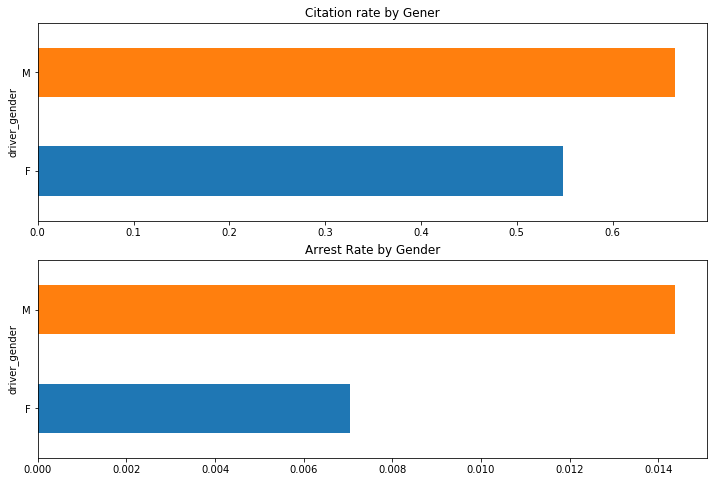

In [40]:
gender_agg = data.groupby('driver_gender').apply(compute_outcome_stats)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (12,8))
gender_agg['citation_per_warning'].plot.barh(ax = axes[0], figsize = (12,8), title='Citation rate by Gener')
gender_agg['arrest_rate'].plot.barh(ax = axes[1], figsize = (12, 8), title = 'Arrest Rate by Gender')

In [41]:
data.groupby(['driver_race','violation']).apply(compute_outcome_stats)

arrest_rate  citation_per_warning  n_arrests  \
driver_race violation                                                          
Asian       DUI                    0.200000              0.333333        2.0   
            Equipment              0.006270              0.132143        2.0   
            Moving violation       0.005563              1.183190       17.0   
            Other                  0.016393              0.875000        1.0   
Black       DUI                    0.200000              0.142857        2.0   
            Equipment              0.029181              0.220651       26.0   
            Moving violation       0.016052              0.942385       71.0   
            Other                  0.048583              2.205479       12.0   
Hispanic    DUI                    0.200000              3.000000        2.0   
            Equipment              0.023560              0.187898        9.0   
            Moving violation       0.012422              1.058824       26.0   
            Other                  0.064935              1.366667        5.0   
White       DUI                    0.192364              0.455026      131.0   
            Equipment              0.012233              0.190486      599.0   
            Moving violation       0.008635              0.732720     1747.0   
            Other                  0.058378              1.476672      547.0   
            Other (non-mapped)     0.000000              1.000000        0.0   

                                n_citations   n_total  n_warnings  
driver_race violation                                              
Asian       DUI                         2.0      10.0         6.0  
            Equipment                  37.0     319.0       280.0  
            Moving violation         1647.0    3056.0      1392.0  
            Other                      28.0      61.0        32.0  
Black       DUI                         1.0      10.0         7.0  
            Equipment                 156.0     891.0       707.0  
            Moving violation         2110.0    4423.0      2239.0  
            Other                     161.0     247.0        73.0  
Hispanic    DUI                         6.0      10.0         2.0  
            Equipment                  59.0     382.0       314.0  
            Moving violation         1062.0    2093.0      1003.0  
            Other                      41.0      77.0        30.0  
White       DUI                       172.0     681.0       378.0  
            Equipment                7736.0   48965.0     40612.0  
            Moving violation        84797.0  202321.0    115729.0  
            Other                    5254.0    9370.0      3558.0  
            Other (non-mapped)          1.0       2.0         1.0

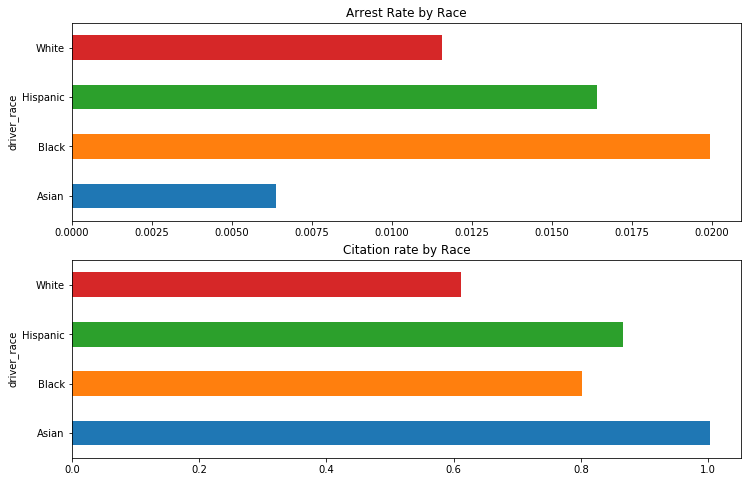

In [42]:
race_agg = data.groupby('driver_race').apply(compute_outcome_stats)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (12,8))
race_agg['citation_per_warning'].plot.barh(ax = axes[1], figsize = (12,8), title='Citation rate by Race')
race_agg['arrest_rate'].plot.barh(ax = axes[0], figsize = (12, 8), title = 'Arrest Rate by Race')

In [43]:
race_agg

,arrest_rate,citation_per_warning,n_arrests,n_citations,n_total,n_warnings
driver_race,,,,,,
Asian,0.006384,1.002339,22.0,1714.0,3446.0,1710.0
Black,0.019925,0.802379,111.0,2428.0,5571.0,3026.0
Hispanic,0.016393,0.865827,42.0,1168.0,2562.0,1349.0
White,0.011571,0.611188,3024.0,97960.0,261339.0,160278.0


In [44]:
data['is_white'] = data['driver_race'] == 'White'

In [45]:
data['is_white'].value_counts()

True     261339
False     11579
Name: is_white, dtype: int64

In [46]:
#remove violation with too few data points
data_filtered = data[~data['violation'].isin(['Other (non-mapped)','DUI'])]

In [47]:
data_filtered.groupby(['is_white','violation']).apply(compute_outcome_stats)

arrest_rate  citation_per_warning  n_arrests  \
is_white violation                                                        
False    Equipment            0.023241              0.193697       37.0   
         Moving violation     0.011910              1.039922      114.0   
         Other                0.046753              1.703704       18.0   
True     Equipment            0.012233              0.190486      599.0   
         Moving violation     0.008635              0.732720     1747.0   
         Other                0.058378              1.476672      547.0   

                           n_citations   n_total  n_warnings  
is_white violation                                            
False    Equipment               252.0    1592.0      1301.0  
         Moving violation       4819.0    9572.0      4634.0  
         Other                   230.0     385.0       135.0  
True     Equipment              7736.0   48965.0     40612.0  
         Moving violation      84797.0  202321.0    115729.0  
         Other                  5254.0    9370.0      3558.0

# visualize Stop outcome and violation results

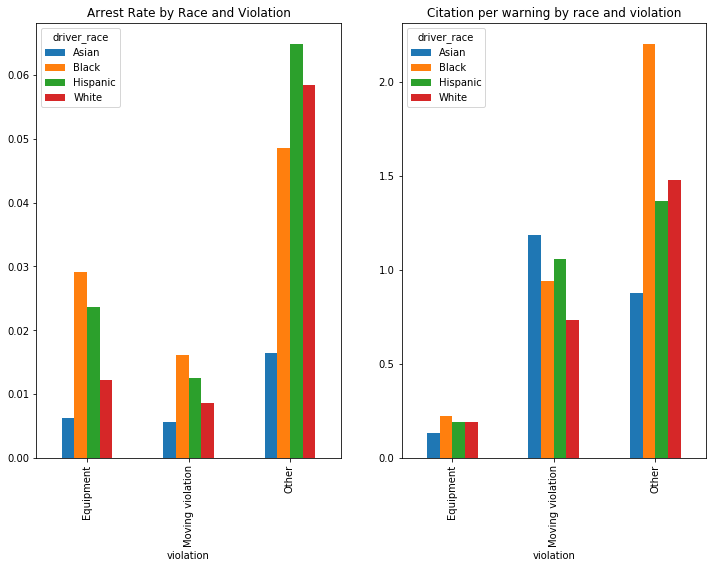

In [48]:
race_stats = data_filtered.groupby(['violation','driver_race']).apply(compute_outcome_stats).unstack()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,8))
race_stats.plot.bar(y='arrest_rate', ax = axes[0], figsize = (12,8), title='Arrest Rate by Race and Violation')
race_stats.plot.bar(y='citation_per_warning', ax = axes[1], figsize = (12, 8), title = 'Citation per warning by race and violation')

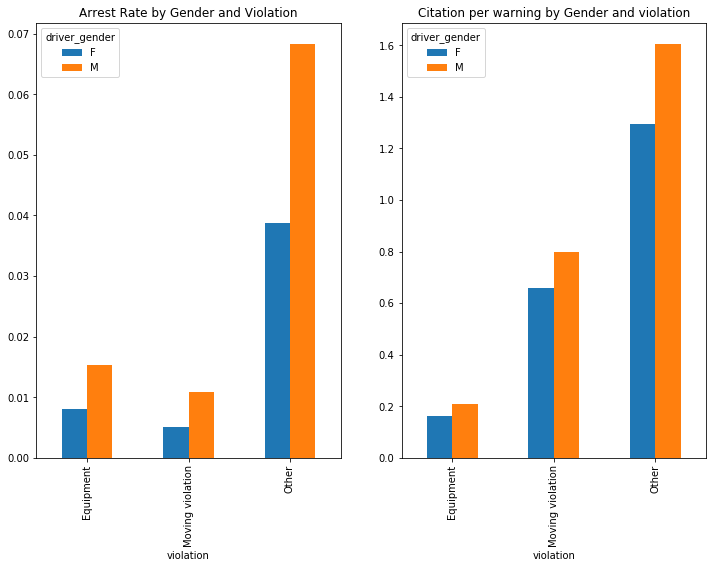

In [49]:
gender_stats = data_filtered.groupby(['violation','driver_gender']).apply(compute_outcome_stats).unstack()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,8))
gender_stats.plot.bar(y='arrest_rate', ax = axes[0], figsize = (12,8), title='Arrest Rate by Gender and Violation')
gender_stats.plot.bar(y='citation_per_warning', ax = axes[1], figsize = (12, 8), title = 'Citation per warning by Gender and violation')

In [50]:
data['search_conducted'].value_counts()

False    269664
True       3254
Name: search_conducted, dtype: int64

In [51]:
data['contraband_found'].value_counts()

False    270325
True       2593
Name: contraband_found, dtype: int64

In [52]:
def compute_search_stats(df):
    search_conducted = df['search_conducted']
    contraband_found = df['contraband_found']
    n_stops = len(search_conducted)
    n_searches = sum(search_conducted)
    n_hits = sum(contraband_found)
    
    if n_stops < 50:
        search_rate = None
    else:
        search_rate = n_searches / n_stops
    
    if n_searches < 5:
        hit_rate = None
    else:
        hit_rate = n_hits / n_searches
    
    return(pd.Series(data = { 'n_stops':n_stops,
                              'n_searches':n_searches,
                              'n_hits':n_hits, 
                              'search_rate': search_rate, 
                              'hit_rate': hit_rate}))
                      

In [53]:
data.groupby('driver_gender').apply(compute_search_stats)

,hit_rate,n_hits,n_searches,n_stops,search_rate
driver_gender,,,,,
F,0.789392,506.0,641.0,99036.0,0.006472
M,0.798699,2087.0,2613.0,173882.0,0.015027


# Search stats by race

In [54]:
data_filtered.groupby('driver_race').apply(compute_search_stats)

,hit_rate,n_hits,n_searches,n_stops,search_rate
driver_race,,,,,
Asian,0.777778,21.0,27.0,3436.0,0.007858
Black,0.685512,194.0,283.0,5561.0,0.050890
Hispanic,0.644231,67.0,104.0,2552.0,0.040752
White,0.815280,2273.0,2788.0,260656.0,0.010696


Black drivers are 500% more likely to be searched than white drivers during a traffic stop, but 13% less likely to be caught with contrband i nthe event of
a search

Hispanic drivers are 400% more likely to be searched than white drivers during a traffic stop, but are 17% less likely to be caught with
contraband in the event of a search

# search stats by age

In [26]:
age_groups = pd.cut(data['driver_age'], np.arange(15,70,5))

In [27]:
age_groups.head()

0    (20, 25]
3    (15, 20]
4    (15, 20]
5    (15, 20]
8    (20, 25]
Name: driver_age, dtype: category
Categories (10, interval[int64]): [(15, 20] < (20, 25] < (25, 30] < (30, 35] ... (45, 50] < (50, 55] < (55, 60] < (60, 65]]

In [29]:
data.groupby(age_groups).apply(compute_outcome_stats)

,arrest_rate,citation_per_warning,n_arrests,n_citations,n_total,n_warnings
driver_age,,,,,,
"(15, 20]",0.011452,0.758811,314.0,11691.0,27418.0,15407.0
"(20, 25]",0.016730,0.779758,724.0,18637.0,43275.0,23901.0
"(25, 30]",0.018585,0.731150,646.0,14400.0,34759.0,19695.0
"(30, 35]",0.015894,0.664207,441.0,10893.0,27746.0,16400.0
"(35, 40]",0.014524,0.642231,337.0,8936.0,23203.0,13914.0
"(40, 45]",0.009645,0.603245,232.0,8960.0,24055.0,14853.0
"(45, 50]",0.009584,0.559694,231.0,8565.0,24103.0,15303.0
"(50, 55]",0.005596,0.522925,126.0,7687.0,22517.0,14700.0
"(55, 60]",0.005085,0.459842,89.0,5485.0,17502.0,11928.0


# Search stats by Race and Location

In [55]:
data.groupby(['county_fips','driver_race']).apply(compute_search_stats).reset_index().dropna()

,county_fips,driver_race,hit_rate,n_hits,n_searches,n_stops,search_rate
1,50001.0,Black,0.562500,9.0,16.0,333.0,0.048048
3,50001.0,White,0.791045,265.0,335.0,22065.0,0.015182
5,50003.0,Black,0.703704,19.0,27.0,382.0,0.070681
7,50003.0,White,0.859712,239.0,278.0,21495.0,0.012933
11,50005.0,White,0.815217,75.0,92.0,16055.0,0.005730
13,50007.0,Black,0.684211,13.0,19.0,650.0,0.029231
14,50007.0,Hispanic,0.571429,4.0,7.0,238.0,0.029412
15,50007.0,White,0.844262,206.0,244.0,23488.0,0.010388
21,50011.0,Black,0.714286,5.0,7.0,297.0,0.023569
23,50011.0,White,0.772947,160.0,207.0,19148.0,0.010811


In [90]:
race_location_agg = data.groupby(['county_fips','driver_race']).apply(compute_search_stats).reset_index().dropna()
race_location_agg.pivot(index='county_fips',columns='driver_race',values='search_rate')

driver_race,Asian,Black,Hispanic,White
county_fips,,,,
50001.0,NaN,0.048048,NaN,0.015182
50003.0,NaN,0.070681,NaN,0.012933
50005.0,NaN,NaN,NaN,0.005730
50007.0,NaN,0.029231,0.029412,0.010388
50011.0,NaN,0.023569,NaN,0.010811
50013.0,NaN,NaN,NaN,0.019724
50015.0,NaN,0.080460,NaN,0.026403
50017.0,NaN,0.025229,0.024590,0.007230
50019.0,NaN,NaN,NaN,0.001280


In [56]:
def gene_comparison_scatter(df, ax, state, race, field, color):
    race_location_agg = df.groupby(['county_fips','driver_race']).apply(compute_search_stats).reset_index().dropna()
    race_location_agg = race_location_agg.pivot(index='county_fips',columns='driver_race',values=field)
    ax = race_location_agg.plot.scatter(ax=ax, x='White', y=race, s=150, label=race,color=color)
    return ax

In [57]:
def format_scatter_chart(ax, state, field):
    ax.set_xlabel('{} - white'.format(field))
    ax.set_ylabel('{} - None-white'.format(field, race))
    ax.set_title('{} by County - {}'.format(field, state))
    lim = max(ax.get_xlim()[1], ax.get_ylim()[1])
    ax.set_xlim(0,lim)
    ax.set_ylim(0,lim)
    diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls='--', c='.3')
    ax.legend()
    return ax

In [58]:
def generate_comparison_scatter(df, state):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,8))
    gene_comparison_scatter(df,axes[0],state,'Black','search_rate','red')
    gene_comparison_scatter(df,axes[0],state,'Hispanic','search_rate','orange')
    gene_comparison_scatter(df,axes[0],state,'Asian','search_rate','green')
    format_scatter_chart(axes[0],state,'Search_rate')
    
#     generate_comparison_scatter(df,axes[1],state,'Black','hit_rate','red')
    gene_comparison_scatter(df,axes[1],state,'Black','hit_rate','red')
    gene_comparison_scatter(df,axes[1],state,'Hispanic','hit_rate','orange')
    gene_comparison_scatter(df,axes[1],state,'Asian','hit_rate','green')
    format_scatter_chart(axes[1],state,'Hit_rate')
    
    return fig

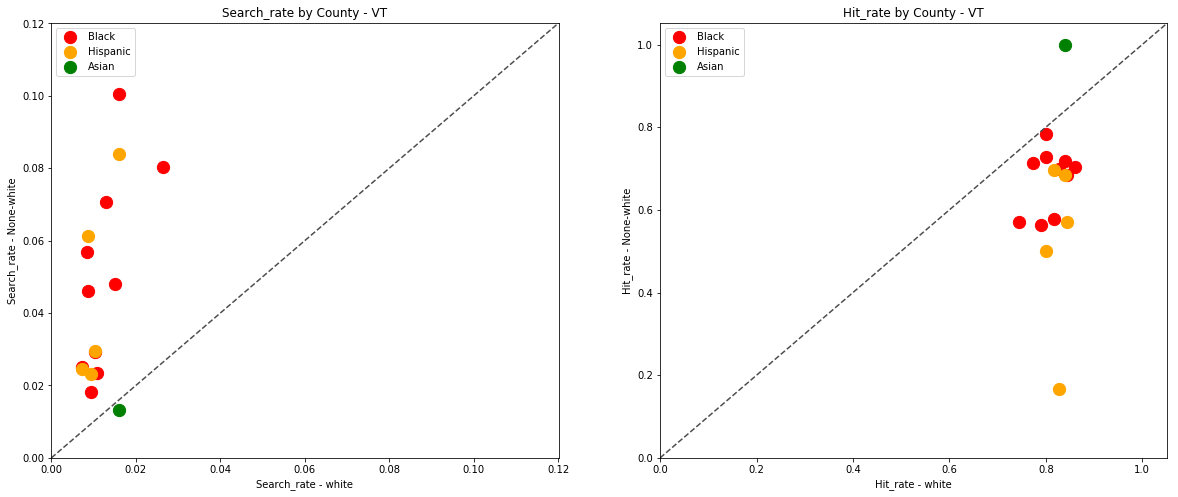

In [59]:
fig = generate_comparison_scatter(data,'VT')

The above figures show the search rate and hit rate of minority drivers compared with white drivers in each county. If all of the color dots are on the diagonal centered line, it would implicate the white drivers and non-white drivers are searched at the same rate and same standard evidence.

In [60]:
def generate_county_search_stats_scatter(df, state):
    race_location_agg = df.groupby(['county_fips','driver_race']).apply(compute_search_stats)
    colors = ['orange','red','green','blue']
    fig, ax = plt.subplots(figsize=(20,8))
    
    for c, frame in race_location_agg.groupby(level='driver_race'):
        ax.scatter(x=frame['hit_rate'],y=frame['search_rate'],s=150,label=c,color=colors.pop())
    ax.legend(loc='upper_center', bbox_to_anchor=(0.5,1.2), ncol=4, fancybox=True)
    ax.set_xlabel('Hit Rate')
    ax.set_ylabel('Search Rate')
    ax.set_title('Search Stats by County and Race - {}'.format(state))
    return fig
    

/Users/zhouyuan57/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:638: UserWarning: Unrecognized location "upper_center". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


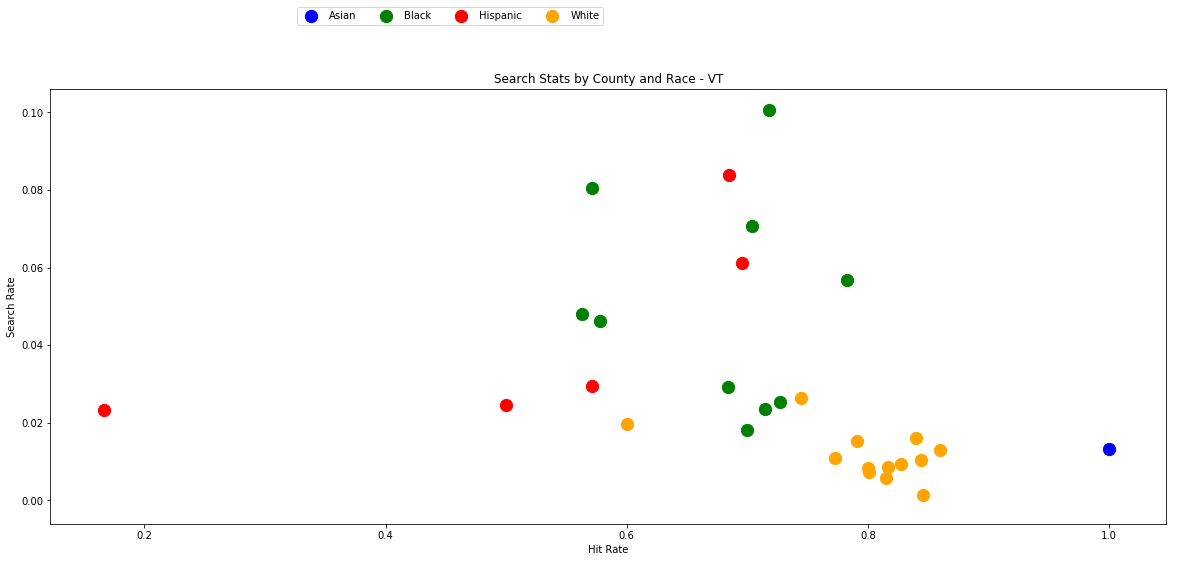

In [61]:
fig = generate_county_search_stats_scatter(data,"VT")

In [113]:
fields = ['county_fips','driver_race','search_conducted','contraband_found']
types = {'countraband_found': bool,
         'county_fips': float,
         'driver_race': 'category',
         'search_conducted': bool
        }

def analyze_state_date(state):
    df = pd.read_csv('./{}-clean.csv.gz'.format(state), compression='gzip', low_memory=False)
    df
    df.dropna(inplace=True)
    
    df = df[df['driver_race'] != 'Other']
    
    pop_list = []
    for col in df.columns:
        if col not in fields:
            pop_list.append(col)
    df = df['driver_race'].drop(pop_list,axis=1)
            
    search_scatters = generate_comparison_scatter(df,state)
    
    county_scatters = generate_county_search_stats_scatter(df,state)
    
    return df.groupby('driver_race').apply(compute_outcome_stats)